In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q datasets sentencepiece

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.

In [ ]:
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.6/595.6 kB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00


In [ ]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from transformers import DonutProcessor, VisionEncoderDecoderModel
from PIL import Image
import re
from collections import defaultdict
import statistics
import pandas as pd
import json
from glob import glob
from tqdm import tqdm

In [ ]:
import locale 
print(locale.getdefaultlocale())
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
print(locale.getpreferredencoding())

('en_US', 'UTF-8')
UTF-8


**Mounted Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -r dataset
!unzip /content/drive/MyDrive/miniProject/benetech-making-graphs-accessible.zip -d dataset

In [ ]:
model_yolo = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/miniProject/pretrain/best_5m.pt')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-6-10 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20885262 parameters, 0 gradients, 48.0 GFLOPs
Adding AutoShape... 


In [ ]:
processor = DonutProcessor.from_pretrained("hoangphu7122002ai/donutAxis_v1")
model = VisionEncoderDecoderModel.from_pretrained("hoangphu7122002ai/donutAxis_v1")

**Metric benchmark**

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.subtract(y_true, y_pred))))

def sigmoid(x):
    return 2 - 2 / (1 + np.exp(-x))


def normalized_rmse(y_true, y_pred) -> float:
    numerator = rmse(y_true, y_pred)
    denominator = rmse(y_true, np.mean(y_true))

    if denominator == 0:
        if numerator == 0:
            return 1.0
        return 0.0

    return sigmoid(numerator / denominator)

def score_series(y_true, y_pred):
    if len(y_true) != len(y_pred):
        return 0.0
    return normalized_rmse(y_true, y_pred)

**Hyperparameter**

In [ ]:
stoi = {'chart_title': 0, 'axis_title': 1, 'tick_label': 2, 'plot-bb': 3, 'x-axis-tick': 4, 'y-axis-tick': 5, 'visual-point': 6}
class_id_to_name_mapping = {v : k for k,v in stoi.items()}

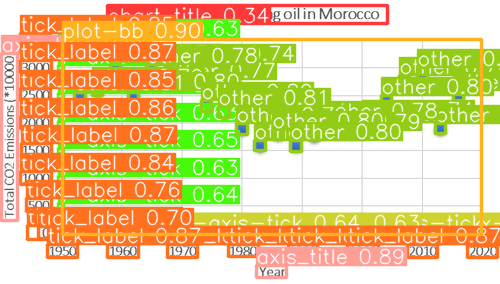

,xmin,ymin,xmax,ymax,confidence,class,name
0,62.208984,39.150894,481.093262,234.211044,0.895402,3,plot-bb
1,256.460419,265.494812,286.077850,277.578827,0.890602,1,axis_title
2,347.890167,244.818466,378.538910,256.928711,0.872016,2,tick_label
3,20.371517,60.574043,51.175835,72.901901,0.868226,2,tick_label
4,21.270998,143.638153,51.270718,156.045776,0.866953,2,tick_label
5,47.790131,244.666382,77.917732,257.183411,0.866623,2,tick_label
6,1.004610,53.137630,17.428959,220.335968,0.863313,1,axis_title
7,467.657562,245.054718,497.437469,257.076324,0.863021,2,tick_label
8,288.257538,244.940872,317.290070,256.872772,0.859776,2,tick_label
9,228.585007,244.476364,258.589325,256.874664,0.857570,2,tick_label


In [ ]:
im = '/content/003e81b2b2eb.jpg'
results = model_yolo(im)
results.show()
results.pandas().xyxy[0]

In [ ]:
annotation_df = results.pandas().xyxy[0]

In [ ]:
df_res = annotation_df[['class','xmin','ymin','xmax','ymax']]

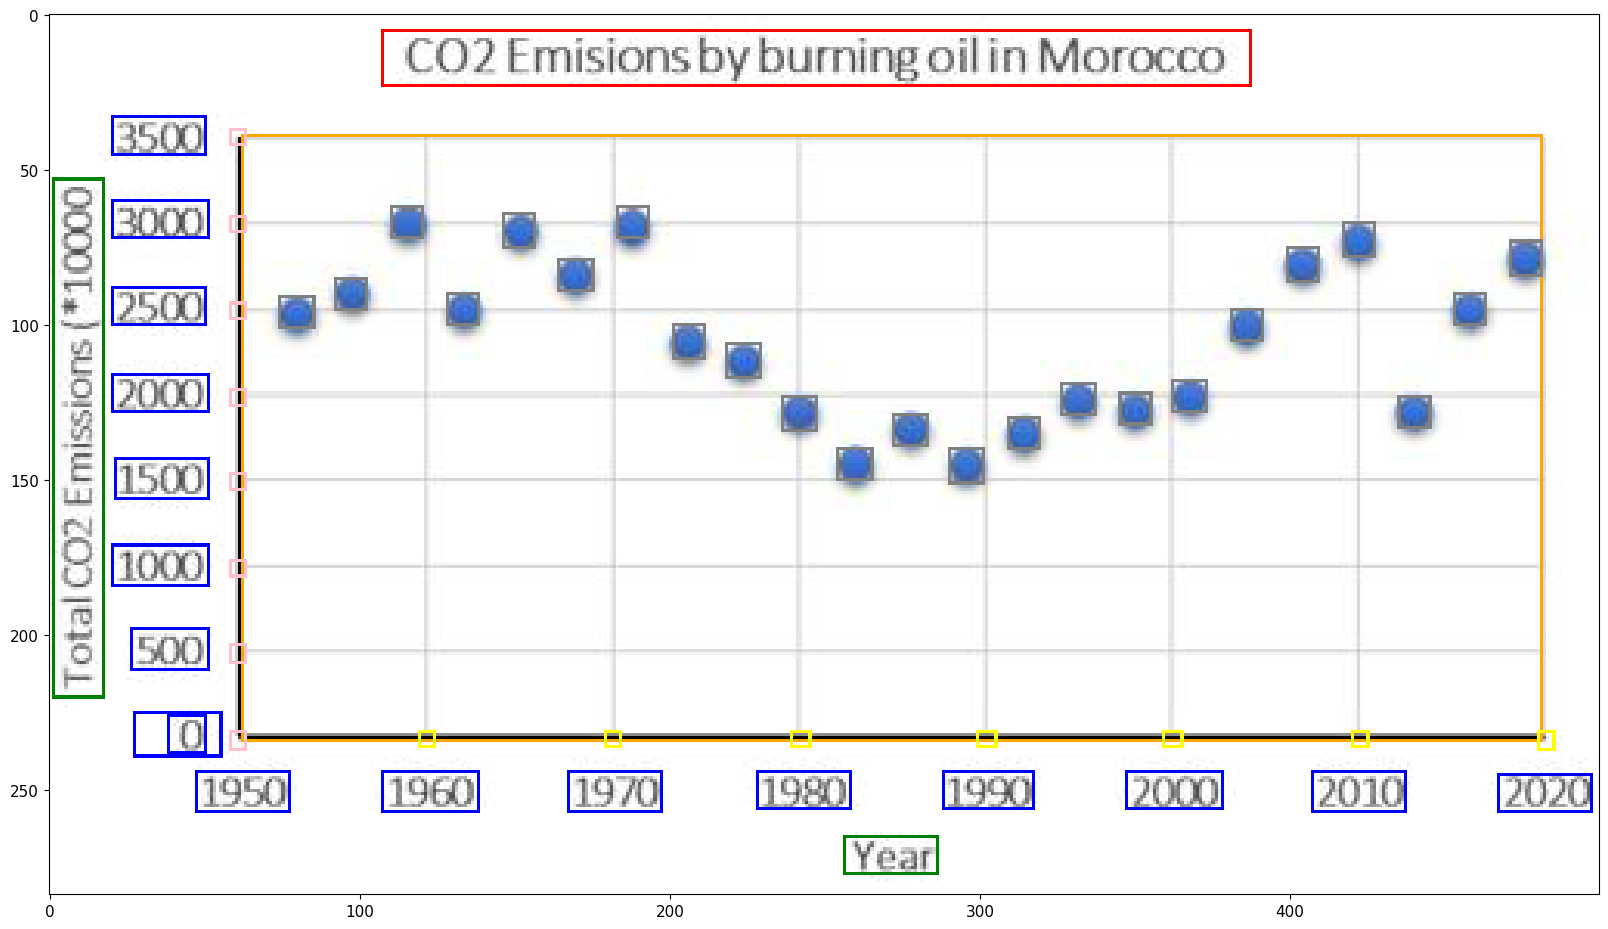

In [ ]:
%matplotlib inline
dict_color = {'chart_title' : 'red',
              'axis_title' : 'green',
              'tick_label' : 'blue',
              'plot-bb' : 'orange',
              'x-axis-tick' : 'yellow',
              'y-axis-tick' : 'pink',
              'visual-point' : 'gray',
              'other' : 'brown',
              'tick_grouping' : 'black'}
plt.rcParams["figure.figsize"] = (20,15)
def plot_bounding_box(image_file, annotation_df):
    image = Image.open(image_file)
    plotted_image = ImageDraw.Draw(image)  
    
    for i,ann in annotation_df.iterrows():
        # obj_cls, x0, y0, w, h = int(ann[0]),int(ann[1]),int(ann[2]),int(ann[3]),int(ann[4])
        obj_cls, x0, y0, x1, y1 = ann.to_list()
        # print(x0,y0,x1,y1)
        plotted_image.rectangle(((x0,y0), (x1,y1)),outline = dict_color[class_id_to_name_mapping[obj_cls]])
    
    plt.imshow(np.array(image))
    plt.show()
plot_bounding_box('/content/003e81b2b2eb.jpg',df_res)

**Model Text**

In [ ]:
def module_text(image_path):
    image = Image.open(image_path)
    pixel_values = processor(image, return_tensors="pt").pixel_values

    task_prompt = "<|PROMPT|>"
    decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt")["input_ids"]

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)

    outputs = model.generate(pixel_values.to(device),
                                  decoder_input_ids=decoder_input_ids.to(device),
                                  max_length=model.decoder.config.max_position_embeddings,
                                  early_stopping=True,
                                  pad_token_id=processor.tokenizer.pad_token_id,
                                  eos_token_id=processor.tokenizer.eos_token_id,
                                  use_cache=True,
                                  num_beams=1,
                                  bad_words_ids=[[processor.tokenizer.unk_token_id]],
                                  return_dict_in_generate=True,
                                  output_scores=True,)

    sequence = processor.batch_decode(outputs.sequences)[0]
    sequence = sequence.replace(processor.decode([model.config.decoder_end_token_id]), "").replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    sequence = re.sub(r"<.*?>", "", sequence, count=1).strip()  # remove first task start token
    sequence = re.sub(r"<one>", "1", sequence)
    sequence = re.sub(r"(?:(?<=>) | (?=</s_))", "", sequence)
    sequence = sequence.split('<tick_label_y_end>')[0] + '<tick_label_y_end>'

    x_tick_label_mark = sequence.split('<tick_label_x_start>')[1].split('<tick_label_x_end>')[0].split(";")
    y_tick_label_mark = sequence.split('<tick_label_y_start>')[1].split('<tick_label_y_end>')[0].split(";")
    try:
      chart_title_mark = sequence.split('<chart_title_start>')[1].split('<chart_title_end>')[0].split(";")
    except:
      chart_title_mark = ''
    try:
      x_axis_title_mark = sequence.split('<axis_title_x_start>')[1].split('<axis_title_x_end>')[0].split(";")
    except:
      x_axis_title_mark = ''
    try:
      y_axis_title_mark = sequence.split('<axis_title_y_start>')[1].split('<axis_title_y_end>')[0].split(";")
    except:
      y_axis_title_mark = ''

    return {
        'x_tick_label_mark' : x_tick_label_mark,
        'y_tick_label_mark' : y_tick_label_mark,
        'chart_title_mark' : chart_title_mark,
        'x_axis_title_mark' : x_axis_title_mark,
        'y_axis_title_mark' : y_axis_title_mark
    }

In [ ]:
module_text('/content/003e81b2b2eb.jpg')

{'x_tick_label_mark': ['1950',
  '1960',
  '1970',
  '1980',
  '1990',
  '2000',
  '2010',
  '2020'],
 'y_tick_label_mark': ['3500',
  '3000',
  '2500',
  '2000',
  '1500',
  '1000',
  '500',
  '0'],
 'chart_title_mark': ['CO2 Emisions by burning oil in Morocco'],
 'x_axis_title_mark': ['Year'],
 'y_axis_title_mark': ['Total CO2 Emissions (*10000']}

**Module_detection**

In [ ]:
def module_bb(image_path):
    results = model_yolo(image_path)
    df = results.pandas().xyxy[0]
    df = df[['class','xmin','ymin','xmax','ymax']]

    dict_res = defaultdict(list)
    for i,ann in df.iterrows():
        list_res = ann.to_list()
        label = class_id_to_name_mapping[list_res[0]]
        dict_res[label].append(list_res[1:])

    return dict_res

**Module extraction**

In [ ]:
from functools import cmp_to_key
 
def compare(pair1, pair2):
    x1, y1 = pair1
    x2, y2 = pair2
    if x1 > x2: return 1
    if x1 < x2: return -1
    if y1 > y2: return 1
    return -1
 
compare_key = cmp_to_key(compare)

def get_extract_range(test_lst):
    Q1 = np.percentile(test_lst, 25, method='midpoint')
    Q3 = np.percentile(test_lst, 75, method='midpoint')
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    return np.mean([ele for ele in test_lst if ele >= lower and ele <= upper])

In [ ]:
def module_extraction(image_path):
    dict_res = module_bb(image_path)
    text_res = module_text(image_path)

    lm_x = np.mean([ele[3] for ele in dict_res['x-axis-tick']])
    lm_y = np.mean([ele[0] for ele in dict_res['y-axis-tick']])
    x0_mark = dict_res['plot-bb'][0][0]
    y0_mark = dict_res['plot-bb'][0][1]
    x1_mark = dict_res['plot-bb'][0][2]
    y1_mark = dict_res['plot-bb'][0][3]

    x_label = []
    y_label = []

    for tick_bb in dict_res['tick_label']:
        if tick_bb[2] < lm_y:
          if tick_bb[1] > lm_x:
              x_label.append(tick_bb)
          else:
              y_label.append(tick_bb)
          continue
        if tick_bb[1] > lm_x:
          x_label.append(tick_bb)

    x_label = sorted(x_label,key = lambda x : x[0] * x[1])
    y_label = sorted(y_label,key = lambda x : x[2] * x[3])
    x_tick = sorted(dict_res['x-axis-tick'],key = lambda x : x[0] * x[1])
    y_tick = sorted(dict_res['y-axis-tick'],key = lambda x : x[2] * x[3])
    if len(x_tick) == len(y_tick) + 1:
      y_tick.append(x_tick[0])
    elif len(x_tick)  == len(y_tick) - 1:
      x_tick = [y_tick[-1]] + x_tick 
    x_tick_label_mark = text_res['x_tick_label_mark']
    y_tick_label_mark = text_res['y_tick_label_mark']

    dx_mark_lst = [float(x_tick_label_mark[i]) - float(x_tick_label_mark[i - 1]) for i in range(1,len(x_tick_label_mark))]
    dy_mark_lst = [float(y_tick_label_mark[i]) - float(y_tick_label_mark[i - 1]) for i in range(1,len(y_tick_label_mark))]    
    dx_mark = statistics.mode(dx_mark_lst)
    dy_mark = statistics.mode(dy_mark_lst)

    dx_pixel_lst = [(x_tick[i][0] + x_tick[i][2])/2 - (x_tick[i-1][0] + x_tick[i-1][2])/2 for i in range(1,len(x_tick))] 
    dy_pixel_lst = [(y_tick[i][1] + y_tick[i][3])/2 - (y_tick[i-1][1] + y_tick[i-1][3])/2 for i in range(1,len(y_tick))] 
    
    dx_p_mark = int(get_extract_range(dx_pixel_lst))
    dy_p_mark = int(get_extract_range(dy_pixel_lst))

    scale_x = dx_mark / dx_p_mark
    scale_y = abs(dy_mark / dy_p_mark)

    val_est = []
    for point in dict_res['visual-point']:
        x = None
        y = None
        point_x = (point[0] + point[2])/2
        point_y = (point[1] + point[3])/2
        est_x = (point_x - x0_mark) * scale_x
        est_y = (y1_mark - point_y) * scale_y
        # print(est_x,est_y)
        if dx_mark_lst[0] > 0: #val duong
          x = float(x_tick_label_mark[0]) + est_x
        else: x = float(x_tick_label_mark[0]) - est_x
        if dy_mark_lst[0] > 0: #val duong
          y = float(y_tick_label_mark[-1]) - est_y
        else: y = float(y_tick_label_mark[-1]) + est_y
        val_est.append([x,y])

    res = sorted(val_est,key = compare_key)

    x = [round(ele[0],3) for ele in res]
    y = [round(ele[1],3) for ele in res]

    return {
        'x' : x,
        'y' : y
    }

In [ ]:
module_extraction('/content/dataset/train/images/95d1a52db0c0.jpg')

{'x': [6.284,
  6.545,
  7.239,
  7.537,
  7.783,
  8.047,
  8.256,
  8.259,
  8.445,
  8.57,
  8.701,
  8.794,
  8.991,
  9.125,
  9.196,
  9.507,
  9.559,
  9.622,
  9.627,
  9.675,
  9.825,
  9.909,
  9.919,
  10.001,
  10.124,
  10.18,
  10.236,
  10.311,
  10.414,
  10.549,
  10.66,
  10.726,
  10.826,
  10.836,
  10.956,
  10.986,
  10.987,
  11.184,
  11.42,
  11.434,
  11.614,
  11.713,
  12.26,
  12.452,
  13.025,
  13.063,
  13.478,
  16.045],
 'y': [7.669,
  5.545,
  8.568,
  5.613,
  9.885,
  7.013,
  4.837,
  6.079,
  7.04,
  8.165,
  6.129,
  8.999,
  8.68,
  12.505,
  7.143,
  10.328,
  8.115,
  8.935,
  7.911,
  9.246,
  9.184,
  9.051,
  12.128,
  11.112,
  15.351,
  11.444,
  17.962,
  10.99,
  13.587,
  6.879,
  12.845,
  11.899,
  11.752,
  15.601,
  11.627,
  15.29,
  16.682,
  18.378,
  11.902,
  13.335,
  20.106,
  11.528,
  17.132,
  18.241,
  19.184,
  24.046,
  17.554,
  21.009]}

**Benchmark test**

In [ ]:
from pathlib import Path

def is_nan(value):
     return isinstance(value, float) and str(value) == "nan"

def round_float(value):
    if isinstance(value, float):
        value = str(value)

        if "." in value:
            integer, decimal = value.split(".")
            if abs(float(integer)) > 1:
                decimal = decimal[:1]
            else:
                decimal = decimal[:4]

            value = integer + "." + decimal
    return value

def get_gt_string_and_xy(filepath):
    filepath = Path(filepath)

    with open(filepath) as fp:
        data = json.load(fp)
    if data['chart-type'] in ['horizontal_bar','vertical_bar','dot','line']:
       return None

    data_series = data["data-series"]

    all_x, all_y = [], []

    for d in data_series:
        x = d["x"]
        y = d["y"]

        x = round_float(x)
        y = round_float(y)

        # Ignore nan values
        if is_nan(x) or is_nan(y):
            continue

        all_x.append(x)
        all_y.append(y)
        
    

    return{
        "image_name" : str(filepath),
        "x": all_x,
        "y": all_y,
    }

In [ ]:
import pickle

with open('filename.pickle', 'rb') as f:
    obj = pickle.load(f)

In [ ]:
ANNOTATION = "/content/dataset/train/annotations/*.json"
ground_truth = []
for file_name in tqdm(glob(ANNOTATION)):
    file_test = file_name.split('/')[-1].split('.')[0]
    if file_test in obj:
      res = get_gt_string_and_xy(file_name)
      if res == None:
        continue
      ground_truth.append(res)

100%|██████████| 60578/60578 [00:00<00:00, 73127.82it/s]


In [ ]:
len(ground_truth)

41

In [ ]:
res = []
for gt in tqdm(ground_truth):
    try:
        image_path = gt["image_name"]
        image_path = "/content/dataset/train/images/" + image_path.split('/')[-1].replace('.json','.jpg')
        pred = module_extraction(image_path)
        pred_x =pred['x']
        gt_x = gt['x']
        pred_y =pred['y']
        gt_y = gt['y']
        gt_x = [round(float(x),3) for x in gt_x]
        gt_y = [round(float(y),3) for y in gt_y]

        #sort để đọc theo hướng từ trên xuống -> dưới và trái -> phải
        point = [[x,y] for x,y in zip(gt_x,gt_y)]
        point = sorted(point,key = compare_key)
        gt_x = [ele[0] for ele in point]
        gt_y = [ele[1] for ele in point]

        res_x = score_series(gt_x,pred_x)
        res_y = score_series(gt_y,pred_y)
        print(res_x,res_y)
        res.append([image_path,res_x,res_y])
    except:
      res.append([image_path,0,0])

In [ ]:
df = pd.DataFrame(res)
df.columns = ["image_name","score_x","score_y"]
df.tail()

In [ ]:
res

In [ ]:
print("score-x:",np.mean(df['score_x'].to_list()))
print("score-y:",np.mean(df['score_y'].to_list()))

In [ ]:
score_x = df['score_x'].to_list()
score_y = df['score_y'].to_list()

score_res = []
for i in range(len(score_x)):
    score = (score_x[i] + score_y[i])/2
    score_res.append(score)

In [ ]:
pd.DataFrame(score_res).hist()
print(np.mean(score_res))

In [ ]:
df.to_csv("/content/drive/MyDrive/miniProject/báo cáo hàng tuần/scatter.csv")